In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold


In [2]:
df = pd.read_csv('data_om_demo_data_1-25-2019.csv')

## Create Confusion Matrix

In [6]:
mapings = {'air':1,'ground':0}
testing_y = df['actual_ship_method_ups'].map(mapings)
predictions = df['recommended_ship_method_ups'].map(mapings)
cm = confusion_matrix(testing_y,predictions)

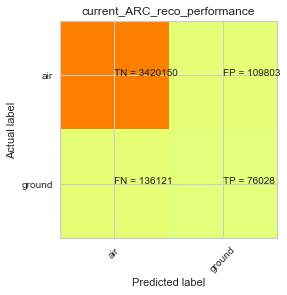

In [7]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['air','ground']
plt.title('current_ARC_reco_performance')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [8]:
print ("\n Classification report : \n",classification_report(testing_y,predictions))
print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))


 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97   3529953
           1       0.41      0.36      0.38    212149

   micro avg       0.93      0.93      0.93   3742102
   macro avg       0.69      0.66      0.67   3742102
weighted avg       0.93      0.93      0.93   3742102

Accuracy   Score :  0.9342818554919133


In [ ]:
df.groupby('actual_ship_method_ups')['actual_ship_method_ups'].count()

In [ ]:
df1 = df[df.actual_ship_method_ups == 'air']
df2 = df[df.actual_ship_method_ups == 'ground']

In [ ]:
z1 = pd.DataFrame(df1.groupby(['sku'])['actual_ship_method_ups'].count())
z2 = pd.DataFrame(df2.groupby(['sku'])['actual_ship_method_ups'].count())

In [ ]:
z1['sku2'] = z1.index
z1 = z1.reset_index(drop = True)
z1['air'] = z1['actual_ship_method_ups']
z1 = z1.drop(columns=['actual_ship_method_ups'])

In [ ]:
z2['sku2'] = z2.index
z2 = z2.reset_index(drop = True)
z2['ground'] = z2['actual_ship_method_ups']
z2 = z2.drop(columns=['actual_ship_method_ups'])

In [ ]:
z3 = z2.merge(z1, left_on = 'sku2', right_on = 'sku2',)

In [ ]:
z3['total_count'] = z3['ground']+z3['air']
z3['air_prop'] = z3['air']/z3['total_count']

In [ ]:
z3['flag'] = np.where(np.logical_and(z3['total_count'] > 100,z3['air_prop']>0.2),1,0)
z3.groupby('flag')['flag'].count()

In [ ]:
z3.loc[z3['flag']==1]